### Importing the libraries we need.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Working with movie budget data

In [2]:
tn_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

In [3]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### There are no null values in our data. Some problems that pop out are that release date is in the wrong format if we want to use that. Also, production_budget, domestic_gross, and worldwide_gross are strings, and they each have '$' and ',' in them that will have to be dealt with.

In [5]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### The code below is cleaning up the production_budget and worldwide_gross by getting rid of the '$' and ',' in the data. Also converting the collumns to integers.

In [6]:
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].astype(int)
tn_budgets['production_budget'] = tn_budgets['production_budget'].astype(int)

In [7]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0


### We decided to only look at movies that have a production budget of at least 50,000 since we are talking to microsoft and they are most likely going to spend more than 50,000. Also threw out all movies that made $0 since those are either data entry mistakes or extreme outliers. The code below does this.

In [8]:
tn_budgets = tn_budgets.loc[(tn_budgets['production_budget'] >= 50000) & (tn_budgets['worldwide_gross'] != 0)]

In [9]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747
...,...,...,...,...,...,...
5715,16,"Aug 9, 1995",The Brothers McMullen,50000,"$10,426,506",10426506
5716,17,"Mar 16, 2001",Gabriela,50000,"$2,335,352",2335352
5717,18,"Nov 12, 2010",Tiny Furniture,50000,"$391,674",424149
5718,19,"Feb 22, 2008",The Signal,50000,"$251,150",406299


### The code below is taking the release_date collumn and turning it into dateTime format, which makes it easier to work with.

In [10]:
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

<ipython-input-10-37abab629d4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])


In [11]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,2019-06-07,Dark Phoenix,350000000,"$42,762,350",149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747
...,...,...,...,...,...,...
5715,16,1995-08-09,The Brothers McMullen,50000,"$10,426,506",10426506
5716,17,2001-03-16,Gabriela,50000,"$2,335,352",2335352
5717,18,2010-11-12,Tiny Furniture,50000,"$391,674",424149
5718,19,2008-02-22,The Signal,50000,"$251,150",406299


#### The code below is making another collumn named 'ROI' that is taking the worldwide_gross divided by the production_budget.

In [12]:
tn_budgets['ROI'] = ((tn_budgets['worldwide_gross']/tn_budgets['production_budget'])*100)

<ipython-input-12-5fd75232db97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_budgets['ROI'] = ((tn_budgets['worldwide_gross']/tn_budgets['production_budget'])*100)


In [13]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,2009-12-18,Avatar,425000000,"$760,507,625",2776345279,653.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,254.667286
2,3,2019-06-07,Dark Phoenix,350000000,"$42,762,350",149762350,42.789243
3,4,2015-05-01,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,424.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,415.369636
...,...,...,...,...,...,...,...
5715,16,1995-08-09,The Brothers McMullen,50000,"$10,426,506",10426506,20853.012000
5716,17,2001-03-16,Gabriela,50000,"$2,335,352",2335352,4670.704000
5717,18,2010-11-12,Tiny Furniture,50000,"$391,674",424149,848.298000
5718,19,2008-02-22,The Signal,50000,"$251,150",406299,812.598000


In [14]:
tn_budgets = tn_budgets.sort_values('ROI',ascending=False)

In [15]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
5613,14,1980-03-21,Mad Max,200000,"$8,750,000",99750000,49875.000000
5492,93,2009-09-25,Paranormal Activity,450000,"$107,918,810",194183034,43151.785333
5679,80,2015-07-10,The Gallows,100000,"$22,764,410",41656474,41656.474000
5406,7,1999-07-14,The Blair Witch Project,600000,"$140,539,099",248300000,41383.333333
5709,10,2004-05-07,Super Size Me,65000,"$11,529,368",22233808,34205.858462
...,...,...,...,...,...,...,...
5335,36,2014-11-21,Food Chains,913000,$0,176,0.019277
2152,53,1997-08-24,The Grimm Brothers' Snow White,26000000,"$5,000",5000,0.019231
3818,19,2015-05-08,Skin Trade,9000000,"$1,242",1242,0.013800
4081,82,2010-05-21,Perrierâs Bounty,6600000,$828,828,0.012545


# Working with imdb data

In [16]:
!ls ../zippedData

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz
im.db.zip               tmdb.movies.csv.gz


In [17]:
con = sqlite3.connect('../zippedData/im.db')

### Using SQLite to get a pandas dataFrame that we want.

In [18]:
query = '''
SELECT movie_id,primary_title as movie,start_year,runtime_minutes,genres
FROM movie_basics
WHERE runtime_minutes is not Null AND movie_id is not Null
    and primary_title is not Null AND original_title is not Null and start_year is not Null and genres is not null
    
'''

imdb = pd.read_sql(query, con)

In [19]:
imdb

,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
112227,tt9916160,Drømmeland,2019,72.0,Documentary
112228,tt9916170,The Rehearsal,2019,51.0,Drama
112229,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
112230,tt9916190,Safeguard,2019,90.0,"Drama,Thriller"


In [20]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112232 entries, 0 to 112231
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   movie            112232 non-null  object 
 2   start_year       112232 non-null  int64  
 3   runtime_minutes  112232 non-null  float64
 4   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB


In [21]:
imdb.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


### There seems to be an outlier in the runtime_minutes. We will merge the tables soon and then check back to see if the outlier is still there.

# Merging the two tables

### Below we make a new start_year collumn to help with the merge, also lowercased the movies and took out spaces to help get more movies after the merge.

In [22]:
tn_budgets['start_year'] = pd.DatetimeIndex(tn_budgets['release_date']).year
tn_budgets['movie'] = tn_budgets['movie'].str.lower()
tn_budgets['movie'] = tn_budgets['movie'].str.replace(" ","")
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year
5613,14,1980-03-21,madmax,200000,"$8,750,000",99750000,49875.000000,1980
5492,93,2009-09-25,paranormalactivity,450000,"$107,918,810",194183034,43151.785333,2009
5679,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015
5406,7,1999-07-14,theblairwitchproject,600000,"$140,539,099",248300000,41383.333333,1999
5709,10,2004-05-07,supersizeme,65000,"$11,529,368",22233808,34205.858462,2004
...,...,...,...,...,...,...,...,...
5335,36,2014-11-21,foodchains,913000,$0,176,0.019277,2014
2152,53,1997-08-24,thegrimmbrothers'snowwhite,26000000,"$5,000",5000,0.019231,1997
3818,19,2015-05-08,skintrade,9000000,"$1,242",1242,0.013800,2015
4081,82,2010-05-21,perrierâsbounty,6600000,$828,828,0.012545,2010


### Below we do the same thing to this table as the above table. We lowercase the movie titles and take out spaces to help movie names match between the tables

In [23]:
imdb['movie'] = imdb['movie'].str.lower()
imdb['movie'] = imdb['movie'].str.replace(" ","")

In [24]:
imdb

,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,onedaybeforetherainyseason,2019,114.0,"Biography,Drama"
2,tt0069049,theothersideofthewind,2018,122.0,Drama
3,tt0100275,thewanderingsoapopera,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,athinlife,2018,75.0,Comedy
...,...,...,...,...,...
112227,tt9916160,drømmeland,2019,72.0,Documentary
112228,tt9916170,therehearsal,2019,51.0,Drama
112229,tt9916186,illenau-diegeschichteeinerehemaligenheil-undpf...,2017,84.0,Documentary
112230,tt9916190,safeguard,2019,90.0,"Drama,Thriller"


## Merging tables

In [25]:
final_table = pd.merge(tn_budgets,imdb,on=['movie','start_year'])
final_table

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres
0,80,2015-07-10,thegallows,100000,"$22,764,410",41656474,41656.474000,2015,tt2309260,81.0,"Horror,Mystery,Thriller"
1,12,2012-01-06,thedevilinside,1000000,"$53,262,945",101759490,10175.949000,2012,tt1560985,83.0,Horror
2,65,2010-10-20,paranormalactivity2,3000000,"$84,752,907",177512032,5917.067733,2010,tt1536044,91.0,Horror
3,49,2017-02-24,getout,5000000,"$176,040,665",255367951,5107.359020,2017,tt5052448,104.0,"Horror,Mystery,Thriller"
4,64,2016-10-21,moonlight,1500000,"$27,854,931",65245512,4349.700800,2016,tt4975722,111.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...
1441,67,2018-05-11,higherpower,500000,$528,528,0.105600,2018,tt2924392,93.0,"Action,Sci-Fi,Thriller"
1442,84,2014-12-31,destiny,750000,$0,450,0.060000,2014,tt3523348,105.0,"Drama,Music,Romance"
1443,62,2015-09-01,brokenhorses,15000000,$0,3471,0.023140,2015,tt2503954,101.0,"Action,Crime,Drama"
1444,36,2014-11-21,foodchains,913000,$0,176,0.019277,2014,tt2141739,83.0,Documentary


In [26]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1445
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1446 non-null   int64         
 1   release_date       1446 non-null   datetime64[ns]
 2   movie              1446 non-null   object        
 3   production_budget  1446 non-null   int64         
 4   domestic_gross     1446 non-null   object        
 5   worldwide_gross    1446 non-null   int64         
 6   ROI                1446 non-null   float64       
 7   start_year         1446 non-null   int64         
 8   movie_id           1446 non-null   object        
 9   runtime_minutes    1446 non-null   float64       
 10  genres             1446 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 135.6+ KB


In [27]:
final_table.describe()

,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes
count,1446.000000,1.446000e+03,1.446000e+03,1446.000000,1446.000000,1446.000000
mean,50.644537,4.747866e+07,1.507109e+08,392.046033,2013.887275,108.013140
std,28.629011,5.671196e+07,2.373306e+08,1223.818807,2.614655,18.877437
min,1.000000,5.000000e+04,2.600000e+01,0.002600,2010.000000,4.000000
25%,26.000000,1.000000e+07,1.463499e+07,100.840256,2012.000000,96.000000
50%,51.000000,2.500000e+07,6.147062e+07,229.962106,2014.000000,106.000000
75%,75.000000,6.000000e+07,1.705289e+08,412.237846,2016.000000,118.000000
max,100.000000,4.106000e+08,2.048134e+09,41656.474000,2019.000000,180.000000


<AxesSubplot:ylabel='Frequency'>

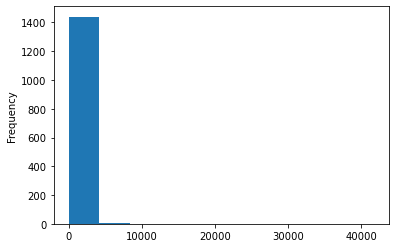

In [28]:
final_table['ROI'].plot(kind='hist')

In [29]:
final_table['ROI'].mean() + (3*final_table['ROI'].std())

4063.5024555249656

## As seen above, there are some extreme outliers at the top end of the 'ROI' data. We are chosing to drop any data that is more than 3X the standard deviation above the mean 'ROI'.

In [30]:
final_table = final_table.loc[final_table['ROI'] < (final_table['ROI'].mean() + (3*final_table['ROI'].std()))]
final_table

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres
7,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller"
8,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller"
9,56,2016-12-21,dangal,9500000,"$12,391,761",294654618,3101.627558,2016,tt5074352,161.0,"Action,Biography,Drama"
10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller"
11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...
1441,67,2018-05-11,higherpower,500000,$528,528,0.105600,2018,tt2924392,93.0,"Action,Sci-Fi,Thriller"
1442,84,2014-12-31,destiny,750000,$0,450,0.060000,2014,tt3523348,105.0,"Drama,Music,Romance"
1443,62,2015-09-01,brokenhorses,15000000,$0,3471,0.023140,2015,tt2503954,101.0,"Action,Crime,Drama"
1444,36,2014-11-21,foodchains,913000,$0,176,0.019277,2014,tt2141739,83.0,Documentary


### This step only took away 7 data points. In an ideal world with more time, it would not be ideal to take away these movies because they did so well, but in this case it skews our data trends.

### There are still outliers at the bottom end of the data. After researching, some of the movies, that are at the bottom end of worldwide gross, just have false info in the table. To get rid of these outliers we are dropping any data that has a worldwide_gross less than or equal to 50,000.

In [31]:
final_table = final_table.loc[final_table['worldwide_gross'] > 50000]
final_table

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres
7,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller"
8,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller"
9,56,2016-12-21,dangal,9500000,"$12,391,761",294654618,3101.627558,2016,tt5074352,161.0,"Action,Biography,Drama"
10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller"
11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...
1421,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama"
1425,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror"
1426,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance"
1436,83,2015-10-30,freaksofnature,33000000,"$70,958",70958,0.215024,2015,tt1817771,92.0,"Comedy,Horror,Sci-Fi"


## This step dropped 43 data points. This is not ideal, and with more time you could go in and by hand add the real data to the table, but in this project it is better to just get rid of the ones with false data.